# Using custom function of project
Import custom function and libraries

In [1]:
from libs.TrashbinDataset import TrashbinDataset
from libs.TDContainer import TDContainer
from libs.PretrainedModels import PretrainedModelsCreator, AlexNet_cc, SqueezeNet_cc, InceptionV3_cc
from libs.utils import get_model_name, import_dataset, reverse_norm

from torchvision import datasets, models, transforms
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.optim as optim
import os
import copy
from torch import nn

In [2]:
def init_model(creator: PretrainedModelsCreator, model_name: str, num_classes: int = 3, feature_extract: bool=True, use_pretrained: bool = True):
    print('Initializing: %s' % (model_name))
    creator.init_model(num_classes=num_classes, model_name=model_name, feature_extract=feature_extract, use_pretrained=use_pretrained)
    # creator.get_info()
    return creator

## Import dataset

In [16]:
# default mean and std needed by pretrained models from pytorch
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

dst_v0 = import_dataset('dataset', 
    train_transform=transforms.Compose([
        transforms.Resize(256),
        transforms.RandomCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=mean, std=std) # default dev and std for pretrained models
    ]),
    test_transform=transforms.Compose([
        transforms.Resize(256), 
        transforms.CenterCrop(224), # crop centrale
        transforms.ToTensor(),
        transforms.Normalize(mean=mean, std=std)     # default dev and std for pretrained models
    ])
)

dst_v0.create_data_loader(batch_size=64, num_workers=2, drop_last=True)

### Visualize DataLoader

Feature batch shape: torch.Size([64, 3, 224, 224])
Labels batch shape: torch.Size([64])


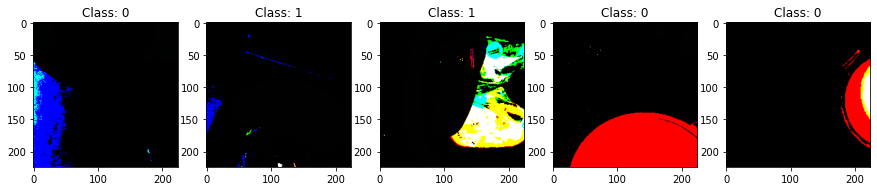

In [17]:
train_dataloader = dst_v0.training_loader

train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

plt.figure(figsize=(15,8))
for i in range(5):
    plt.subplot(2,5,i+1)
    plt.title("Class: %s" % train_labels[0].numpy())
    img = train_features[0].squeeze()
    label = train_labels[0]
    plt.imshow(reverse_norm(img.numpy().transpose(1, 2, 0)))
    train_features, train_labels = next(iter(train_dataloader))
plt.show()

### Default values for trainings

Define standard values for train the models. Needed only for test

In [5]:
num_epochs = 5
lr = 0.001
momentum = 0.99
criterion = nn.CrossEntropyLoss()

# li setto per evitare di scordarli ma non sono necessari
train_from_epoch = 0
save_each_iter = 1
resume_global_step_from = 0

Test that the functions work correctly and perform two training of 5 epoch on the SqueezeNet model: one pretrained and one from scratch

### Create SqueezeNet model and train

#### Train using pretrained model

In [6]:
squeezeNet_v0 = init_model(creator=SqueezeNet_cc(), model_name=get_model_name(model_name='SqueezeNet_v0', lr='0.001'), feature_extract=True, use_pretrained=True)
trained_model, history = squeezeNet_v0.do_train(dataset=dst_v0, num_epochs=num_epochs, lr=lr, momentum=momentum, criterion=criterion, train_from_epoch=train_from_epoch, save_each_iter=save_each_iter, resume_global_step_from=resume_global_step_from)

Initializing: SqueezeNet_v0__lr=0.001
Feature extract is setted to:  True
	 classifier.1.weight
	 classifier.1.bias
INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2
Epoch 0/4
----------
train Loss: 0.4803 Acc: 0.7862
validation Loss: 0.1354 Acc: 0.9022
Epoch 1/4
----------
train Loss: 0.1940 Acc: 0.9232
validation Loss: 0.1441 Acc: 0.8948
Epoch 2/4
----------
train Loss: 0.1523 Acc: 0.9402
validation Loss: 0.0677 Acc: 0.9170
Epoch 3/4
----------
train Loss: 0.1384 Acc: 0.9467
validation Loss: 0.0734 Acc: 0.9141
Epoch 4/4
----------
train Loss: 0.1159 Acc: 0.9536
validation Loss: 0.0619 Acc: 0.9215
Training complete in 18m 38s
Best val Acc: 0.921481


#### Train from scratch

In [7]:
squeezeNet_v0_scratch = init_model(creator=SqueezeNet_cc(), model_name=get_model_name(model_name='SqueezeNet_v0_scratch', lr='0.001'), feature_extract=False, use_pretrained=False)
trained_model, history = squeezeNet_v0_scratch.do_train(dataset=dst_v0, num_epochs=num_epochs, lr=lr, momentum=momentum, criterion=criterion, train_from_epoch=train_from_epoch, save_each_iter=save_each_iter, resume_global_step_from=resume_global_step_from)

Initializing: SqueezeNet_v0_scratch__lr=0.001
Feature extract is setted to:  False
	 features.0.weight
	 features.0.bias
	 features.3.squeeze.weight
	 features.3.squeeze.bias
	 features.3.expand1x1.weight
	 features.3.expand1x1.bias
	 features.3.expand3x3.weight
	 features.3.expand3x3.bias
	 features.4.squeeze.weight
	 features.4.squeeze.bias
	 features.4.expand1x1.weight
	 features.4.expand1x1.bias
	 features.4.expand3x3.weight
	 features.4.expand3x3.bias
	 features.5.squeeze.weight
	 features.5.squeeze.bias
	 features.5.expand1x1.weight
	 features.5.expand1x1.bias
	 features.5.expand3x3.weight
	 features.5.expand3x3.bias
	 features.7.squeeze.weight
	 features.7.squeeze.bias
	 features.7.expand1x1.weight
	 features.7.expand1x1.bias
	 features.7.expand3x3.weight
	 features.7.expand3x3.bias
	 features.8.squeeze.weight
	 features.8.squeeze.bias
	 features.8.expand1x1.weight
	 features.8.expand1x1.bias
	 features.8.expand3x3.weight
	 features.8.expand3x3.bias
	 features.9.squeeze.weight
	

### Create AlexNet model

In [ ]:
alexNet_v0 = init_model(creator=AlexNet_cc(), model_name=get_model_name(model_name='AlexNet_v0', lr='0.001'), feature_extract=True, use_pretrained=True)
trained_model, history = alexNet_v0.do_train(dataset=dst_v0, num_epochs=num_epochs, lr=lr, momentum=momentum, criterion=criterion, train_from_epoch=train_from_epoch, save_each_iter=save_each_iter, resume_global_step_from=resume_global_step_from)

### Create InceptionV3 model

In [ ]:
inceptionv3_v0 = init_model(creator=InceptionV3_cc(), model_name=get_model_name(model_name='InceptionV3_v0', lr='0.001'), feature_extract=True, use_pretrained=True)
trained_model, history = inceptionv3_v0.do_train(dataset=dst_v0, num_epochs=num_epochs, lr=lr, momentum=momentum, criterion=criterion, train_from_epoch=train_from_epoch, save_each_iter=save_each_iter, resume_global_step_from=resume_global_step_from)